<a href="https://colab.research.google.com/github/rcpsilva/BCC740_ArtificialIntelligence/blob/main/BCC325_PyTorchFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Transform image to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Get training set
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Get test set
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create Loaders
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset,shuffle=True, batch_size=batch_size)
testloader = torch.utils.data.DataLoader(testset,shuffle=True, batch_size=batch_size)

classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


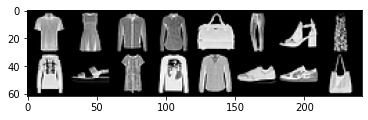

T-Shirt, Dress, Coat, Shirt, Bag, Trouser, Sandal, Dress, Pullover, Sandal, Dress, Pullover, Shirt, Sneaker, Sneaker, Bag


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imgshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

# Get a batch of images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imgshow(torchvision.utils.make_grid(images))

# print labels
print(', '.join('%s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(28*28,16) 
    self.fc2 = nn.Linear(16,16)
    self.fc3 = nn.Linear(16,16)
    self.fc4 = nn.Linear(16,10) 

  def forward(self, x):
    x = x.view(-1,28*28)
    #x = torch.sigmoid(self.fc1(x))
    #x = torch.sigmoid(self.fc2(x))
    #x = torch.sigmoid(self.fc3(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = torch.sigmoid(self.fc4(x))
    return x

In [ ]:
net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [ ]:
nepochs = 30

for epoch in range(nepochs):
  running_loss = 0.0

  for i, data in enumerate(trainloader,0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step() 

    running_loss += loss.item()
    n_batch = 1000
    if i % n_batch == (n_batch-1):
        print('[%d, %i] loss: %.3f' % (epoch+1, i+1, running_loss/n_batch))
        running_loss = 0.0

print('Finished Training')

[1, 1000] loss: 2.300
[1, 2000] loss: 2.284
[1, 3000] loss: 2.196
[2, 1000] loss: 1.971
[2, 2000] loss: 1.922
[2, 3000] loss: 1.909
[3, 1000] loss: 1.893
[3, 2000] loss: 1.889
[3, 3000] loss: 1.886
[4, 1000] loss: 1.880
[4, 2000] loss: 1.878
[4, 3000] loss: 1.872
[5, 1000] loss: 1.860
[5, 2000] loss: 1.849
[5, 3000] loss: 1.805
[6, 1000] loss: 1.768
[6, 2000] loss: 1.758
[6, 3000] loss: 1.743
[7, 1000] loss: 1.730
[7, 2000] loss: 1.730
[7, 3000] loss: 1.729
[8, 1000] loss: 1.724
[8, 2000] loss: 1.717
[8, 3000] loss: 1.720
[9, 1000] loss: 1.714
[9, 2000] loss: 1.710
[9, 3000] loss: 1.707
[10, 1000] loss: 1.706
[10, 2000] loss: 1.704
[10, 3000] loss: 1.702
[11, 1000] loss: 1.702
[11, 2000] loss: 1.698
[11, 3000] loss: 1.700
[12, 1000] loss: 1.698
[12, 2000] loss: 1.694
[12, 3000] loss: 1.696
[13, 1000] loss: 1.691
[13, 2000] loss: 1.692
[13, 3000] loss: 1.690
[14, 1000] loss: 1.687
[14, 2000] loss: 1.692
[14, 3000] loss: 1.684
[15, 1000] loss: 1.687
[15, 2000] loss: 1.686
[15, 3000] loss

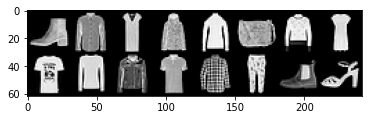

(Ankle Boot : Sandal), (Shirt : T-Shirt), (Dress : Dress), (Coat : T-Shirt), (Pullover : T-Shirt), (Bag : Bag), (Pullover : T-Shirt), (Dress : Dress), (T-Shirt : T-Shirt), (Pullover : T-Shirt), (Coat : T-Shirt), (T-Shirt : T-Shirt), (Shirt : T-Shirt), (Trouser : Trouser), (Ankle Boot : Sandal), (Sandal : Sandal)


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))

output = net(images)
_, predicted = torch.max(output,1)

print(', '.join('(%s : %s)' % (classes[labels[j]],classes[predicted[j]]) for j in range(batch_size)))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs,1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

print('Accuracy: %.2f %%' % (correct/total*100))

Accuracy: 39.37 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-Shirt : 90 %
Accuracy of Trouser : 14 %
Accuracy of Pullover :  0 %
Accuracy of Dress : 91 %
Accuracy of  Coat :  0 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 12 %
Accuracy of Sneaker :  0 %
Accuracy of   Bag : 90 %
Accuracy of Ankle Boot :  0 %
